In [2]:
%matplotlib inline
import os
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import warnings
sns.set()

In [3]:
# loading the data from dataframe
df=pd.read_csv('beer_reviews.csv')

In [4]:
# lenght of the dataframe
len(df)

1586614

In [5]:
# column s of the data frame
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [6]:
# reading the data from dataframe
df.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [7]:
# Visualizing the data


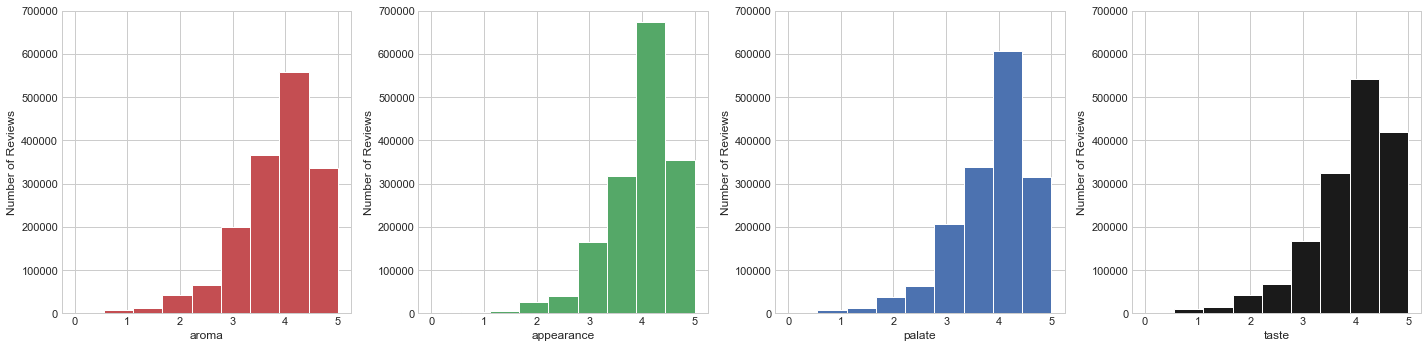

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
reviews = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']
beer_reviews = df[reviews].dropna(axis=1)
beer_reviews.head()

fig, ax = plt.subplots(ncols=4, figsize = (20,5))
colors = ['r', 'g', 'b', 'k', 'm']
for idx, head in enumerate(reviews[1:]):
    plt.subplot(1, len(reviews[1:]), idx+1)
    plt.ylim(0,7e+05)
    plt.xlabel(head.split('_')[1])
    plt.ylabel('Number of Reviews')
    plt.hist(beer_reviews[head], bins=np.linspace(0, 5, 10), color=colors[idx])
plt.tight_layout(h_pad=1.0)

In [ ]:
# Which brewery produces the strongest beers by ABV% ?
# Step1: Data Cleaning
# Extract ABV% data
# Remove undefined values or "NaN"
# Remove duplicates. More than one users have rated the beers (duplicate abv% values). However, for sorting and ranking, these things don't matter.
# Step2: Sorting and Ranking
# Sort the data in "beer_abv" column in descending order
# Pick the top one in the list with highest ABV
# Step3: Display Results
# Get other identifiers associated with that beer, Beer Name, Beer Style, Brewery Name etc.
# Additional Info: Display all the beers produced by that brewery

In [9]:
# Drop the unnecessary columns  
abs_brev=df.drop(['review_time', 'review_overall','review_aroma', 'review_appearance', 'review_profilename','review_palate', 'review_taste',], axis=1)



In [10]:
abs_brev.head()

,brewery_id,brewery_name,beer_style,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,Hefeweizen,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,English Strong Ale,Red Moon,6.2,48213
2,10325,Vecchio Birraio,Foreign / Export Stout,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,German Pilsener,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,American Double / Imperial IPA,Cauldron DIPA,7.7,64883


In [11]:
# missing column table with missing value and percentage of missing value from dataset
 def missing_values_table(abs_brev):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [12]:
missing_values_table(abs_brev)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
beer_abv,67785,4.3
review_profilename,348,0.0
brewery_name,15,0.0


In [13]:
# dropping the nulls from the datafrae
# as the dataset is huge dropping the nulls doesn't be a problem
abs_brev = abs_brev.dropna()

In [15]:
#Drop duplicates and sort values by ABV%
abs_brev = abs_brev.drop_duplicates('beer_beerid').sort_values(by="beer_abv", ascending=False)

#Display
abs_brev.head()

,brewery_id,brewery_name,beer_style,beer_name,beer_abv,beer_beerid
12919,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 57%,57.70,73368
12939,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 43%,43.00,57856
746310,16315,BrewDog,American Double / Imperial IPA,Sink The Bismarck!,41.00,57015
12934,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 40%,39.44,55712
996149,15237,De Struise Brouwers,American Double / Imperial Stout,Black Damnation VI - Messy,39.00,70633


In [16]:
brewery_name = abs_brev.iloc[0].brewery_name

# Get all the beers produced by that brewery
strongest = abs_brev[abs_brev.brewery_name == brewery_name]

#Display brews
strongest

,brewery_id,brewery_name,beer_style,beer_name,beer_abv,beer_beerid
12919,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 57%,57.70,73368
12939,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 43%,43.00,57856
12934,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 40%,39.44,55712
12918,6513,Schorschbräu,Eisbock,Schorschbräu Schorschbock 31%,30.86,51466
12911,6513,Schorschbräu,Doppelbock,Schorschbock,16.00,47421
12917,6513,Schorschbräu,Weizenbock,Schorsch Weizen 16%,16.00,71004
12910,6513,Schorschbräu,Eisbock,Schorschbock Ice 13,13.00,73357
12914,6513,Schorschbräu,Doppelbock,Schorschbräu Donner Bock,13.00,15578
12928,6513,Schorschbräu,Weizenbock,Schorschbräu Donner Weizen,13.00,20169
12909,6513,Schorschbräu,Munich Dunkel Lager,Schorschbräu Dunkles,4.90,32973


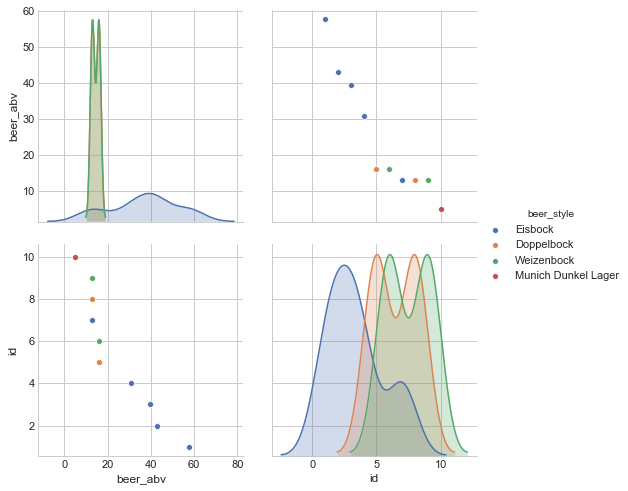

In [18]:
#visualizing ther strongest

warnings.filterwarnings('ignore')
ABV = strongest[['beer_name', 'beer_abv', 'beer_style']]
ABV['id'] = np.linspace(1,len(ABV), len(ABV))
sns.pairplot(data=ABV, hue='beer_style', size=3.5)

In [19]:
# Schorschbräu produces the strongest beers by ABV%?

In [20]:
# 2. If you had to pick 3 beers to recommend using only this data, which would you pick?

In [ ]:
# I WILL pick the 3 beers based on the mean of the review_overall,  review_aroma,  review_appearance, review_palate,  review_taste  and beer_abv

In [25]:
pick = df.groupby('beer_name').agg({'review_overall': np.mean,
                                'review_aroma': np.mean,
                                'review_appearance': np.mean,
                                'review_palate': np.mean,     
                                'review_taste': np.mean,
                                'beer_abv': np.mean})

sample = pd.DataFrame(pick.reset_index())

topbeers = sample.sort_values(['review_overall', 'review_aroma','review_appearance','review_palate','review_taste','beer_abv'], ascending=[False,False, False, False, False, False])
topbeers[:3]

,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
36759,Old Incinerator Brandy Barrel Barleywine,5.0,5.0,5.0,5.0,5.0,13.0
12035,Chicago Terminal Oatmeal Bourbon Stout,5.0,5.0,5.0,5.0,5.0,11.0
5406,Bell's Batch 2000,5.0,5.0,5.0,5.0,5.0,10.5


In [26]:
# i would recommend Old Incinerator Brandy Barrel Barleywine,Chicago Terminal Oatmeal Bourbon Stout and  Bell's Batch 2000 beers

In [ ]:
#3 3. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

In [ ]:
# extract the required columns from the dataset
# check the normality of the data
# find the correlation between the variablesx

In [27]:
factors = df[['review_overall','review_aroma','review_taste','review_appearance','review_palate']]

In [28]:
factors.head()

,review_overall,review_aroma,review_taste,review_appearance,review_palate
0,1.5,2.0,1.5,2.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.0,3.0,3.0,3.5,2.5
4,4.0,4.5,4.5,4.0,4.0


In [30]:

from scipy.stats import shapiro
stat, p = shapiro(factors)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.900, p=0.000
Sample does not look Gaussian (reject H0)


In [31]:
# as the dataset rejects null hypothesis it is not normalize 
#so we need to perform spearman and kendall

In [32]:
kendall=factors.corr(method ='kendall')
kendall

,review_overall,review_aroma,review_taste,review_appearance,review_palate
review_overall,1.000000,0.478637,0.649369,0.387587,0.570974
review_aroma,0.478637,1.000000,0.584729,0.425626,0.484108
review_taste,0.649369,0.584729,1.000000,0.420694,0.602040
review_appearance,0.387587,0.425626,0.420694,1.000000,0.442756
review_palate,0.570974,0.484108,0.602040,0.442756,1.000000


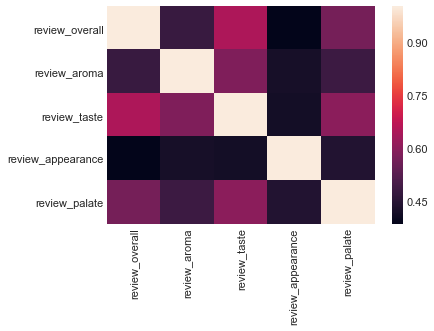

In [34]:
sns.heatmap(kendall)

In [33]:
spearman=factors.corr(method ='spearman')
spearman

,review_overall,review_aroma,review_taste,review_appearance,review_palate
review_overall,1.000000,0.558447,0.730210,0.455179,0.653836
review_aroma,0.558447,1.000000,0.670389,0.498069,0.564874
review_taste,0.730210,0.670389,1.000000,0.493867,0.687813
review_appearance,0.455179,0.498069,0.493867,1.000000,0.514336
review_palate,0.653836,0.564874,0.687813,0.514336,1.000000


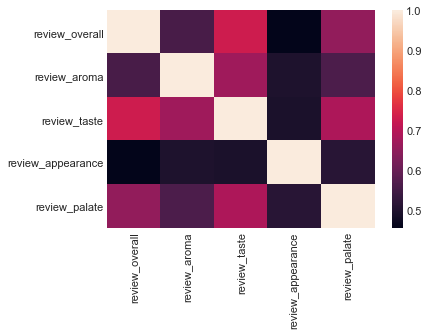

In [35]:
sns.heatmap(spearman)

In [36]:
#Review Overall has a high and positive correlation with review taste of 0.65,0.73 with kendall and spearman and this tells me that Review Overall has strong relationship with the review taste.¶




In [ ]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# attentuate affect of outliers in price
factors['review_overall'] = np.log(factors['review_overall'])

df_train, df_test = train_test_split(df, test_size=0.20)

features = ['review_aroma','review_taste','review_appearance','review_palate','review_overall']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('review_overall',axis=1), df_train['review_overall']
X_test, y_test = df_test.drop('review_overall',axis=1), df_test['review_overall']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()


df_train, df_test = train_test_split(df_orig, test_size=0.20)
features = ['review_aroma','review_taste','review_appearance','review_palate']
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('interest_level',axis=1), df_train['interest_level']
X_test, y_test = df_test.drop('interest_level',axis=1), df_test['interest_level']
# Add column of random numbers
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [40]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [41]:
# attentuate affect of outliers in price
factors['review_overall'] = np.log(factors['review_overall'])

In [42]:

df_train, df_test = train_test_split(df, test_size=0.20)

In [46]:
features = ['review_aroma','review_taste','review_appearance','review_palate','review_overall']
df_train = df_train[features]
df_test = df_test[features]

In [45]:
X_train, y_train = df_train.drop('review_overall',axis=1), df_train['review_overall']
X_test, y_test = df_test.drop('review_overall',axis=1), df_test['review_overall']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))



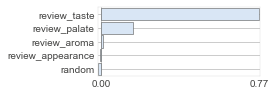

In [48]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

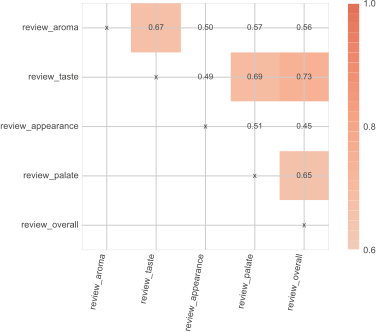

In [51]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(df_train, figsize=(7,5))
viz

In [52]:
# random forest also demonstrates that taste is an important factor in determing the overall quality of a beer

In [53]:
# Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [ ]:
# prepare a datset with required columns 
#create dataframe based on various parameters namely mean, max, size and merge to a sinle dataset
# sort the values and recommend top 10

In [111]:
df2= df[['review_aroma','review_appearance','beer_style']]
df2.head()

,review_aroma,review_appearance,beer_style
0,2.0,2.5,Hefeweizen
1,2.5,3.0,English Strong Ale
2,2.5,3.0,Foreign / Export Stout
3,3.0,3.5,German Pilsener
4,4.5,4.0,American Double / Imperial IPA


In [118]:
dataset1 = df2.groupby('beer_style').agg({'review_aroma': np.mean,
                                'review_appearance': np.mean})
dataset1 = pd.DataFrame(dataset1.reset_index())
dataset1.columns = ['beer_style','review_aroma_mean','review_appearance_mean']



dataset2 = df2.groupby('beer_style').agg({'review_aroma': np.max,
                                             'review_appearance': np.max})
dataset2 = pd.DataFrame(dataset2.reset_index())
dataset2.columns = ['beer_style','review_aroma_max','review_appearance_max']


dataset3 = df.groupby('beer_style').agg({'review_aroma': np.size,
                                             'review_appearance': np.size})
dataset3 = pd.DataFrame(dataset3.reset_index())
dataset3.columns = ['beer_style','review_aroma_count','review_appearance_count']


enjoy_beer = pd.merge(pd.merge(dataset2, dataset1, on='beer_style'),dataset3, on='beer_style')
enjoy_beer.head()


,beer_style,review_aroma_max,review_appearance_max,review_aroma_mean,review_appearance_mean,review_aroma_count,review_appearance_count
0,Altbier,5.0,5.0,3.624015,3.809327,7741.0,7741.0
1,American Adjunct Lager,5.0,5.0,2.480211,2.788546,30749.0,30749.0
2,American Amber / Red Ale,5.0,5.0,3.627254,3.810190,45751.0,45751.0
3,American Amber / Red Lager,5.0,5.0,3.213296,3.527494,9311.0,9311.0
4,American Barleywine,5.0,5.0,4.019343,4.036535,26728.0,26728.0


In [122]:
recomd = beer_style.sort_values(['review_aroma_count','review_appearance_count','review_aroma_mean', 'review_appearance_mean','review_aroma_max','review_appearance_max'], ascending=[False, False,False, False, False, False])
top = recomd[:10]['beer_style']

In [127]:
recomd

,index_x,beer_style,review_aroma_max,review_appearance_max,index_y,review_aroma_mean,review_appearance_mean,index,review_aroma_count,review_appearance_count
12,12,American IPA,5.0,5.0,12,3.894103,3.968525,12,117586.0,117586.0
9,9,American Double / Imperial IPA,5.0,5.0,9,4.097782,4.078916,9,85977.0,85977.0
14,14,American Pale Ale (APA),5.0,5.0,14,3.657746,3.781610,14,63469.0,63469.0
89,89,Russian Imperial Stout,5.0,5.0,89,4.076576,4.210072,89,54129.0,54129.0
11,11,American Double / Imperial Stout,5.0,5.0,11,4.160665,4.163633,11,50705.0,50705.0
17,17,American Porter,5.0,5.0,17,3.836470,3.957396,17,50477.0,50477.0
2,2,American Amber / Red Ale,5.0,5.0,2,3.627254,3.810190,2,45751.0,45751.0
25,25,Belgian Strong Dark Ale,5.0,5.0,25,3.972260,4.008293,25,37743.0,37743.0
60,60,Fruit / Vegetable Beer,5.0,5.0,60,3.525560,3.517985,60,33861.0,33861.0
19,19,American Strong Ale,5.0,5.0,19,3.979574,4.026749,19,31945.0,31945.0


In [ ]:
# I would recommend Amercian IPA,  American Double / Imperial IPA, American Pale Ale (APA), Russian Imperial Stout and American Porter based on aroma and appearances  